# <center>Model Testing</center>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/AMLTF IA

/content/drive/MyDrive/Colab Notebooks/AMLTF IA


## Imports

In [ ]:
from keras.models import load_model, Model
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
ls

 model.png               overfit_loss.csv   vgg.h5
'Model Testing.ipynb'    rps/               vggmodel.csv
'Model Training.ipynb'   rps-pred/         'Visualization of CNN layers.ipynb'
 overfit.h5              rps-test-set/


rps-pred directory contains 33 test images



In [ ]:
ls rps-pred

paper1.png  paper-hires1.png  rock8.png        scissors6.png
paper2.png  paper-hires2.png  rock9.png        scissors7.png
paper3.png  rock1.png         rock-hires1.png  scissors8.png
paper4.png  rock2.png         rock-hires2.png  scissors9.png
paper5.png  rock3.png         scissors1.png    scissors-hires1.png
paper6.png  rock4.png         scissors2.png    scissors-hires2.png
paper7.png  rock5.png         scissors3.png
paper8.png  rock6.png         scissors4.png
paper9.png  rock7.png         scissors5.png


## Testing custom model

In [ ]:
#loading the model
overfit_model = load_model('overfit.h5')

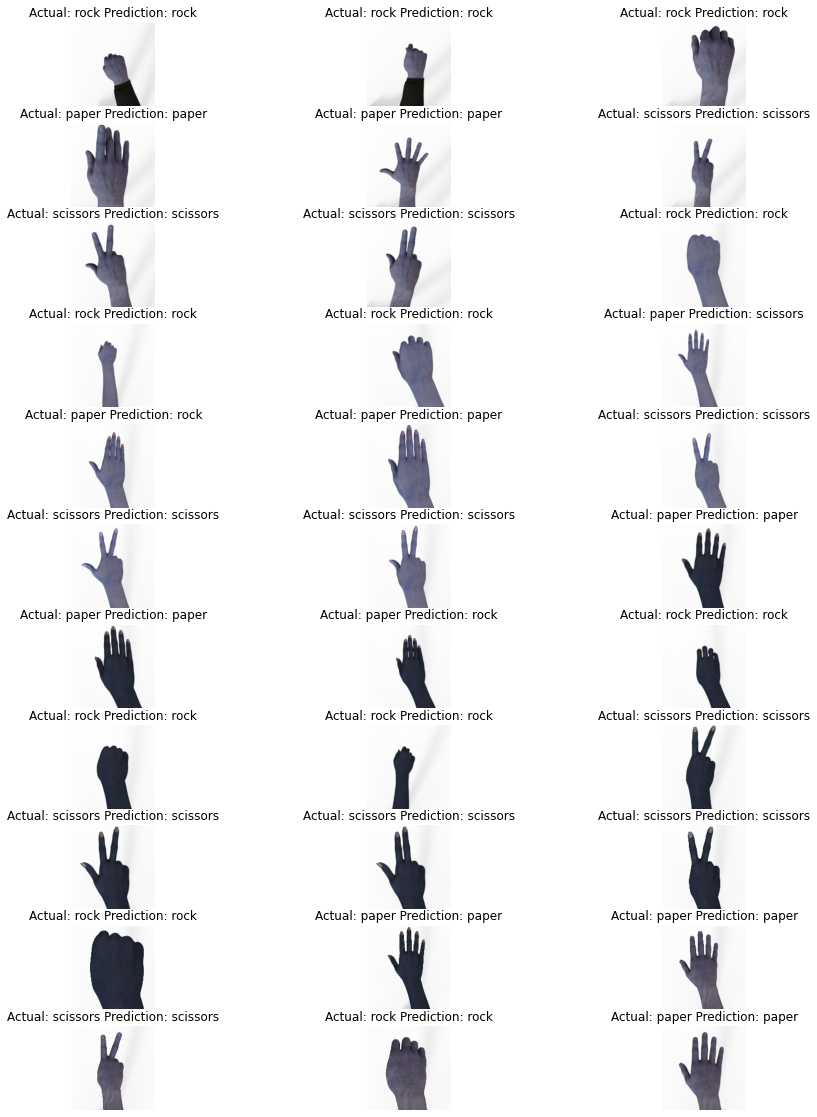

In [ ]:
# Defining the class labels
labels = {'r': 'rock', 'p': 'paper', 's': 'scissors'}
pred_labels = {0: 'paper', 1: 'rock', 2: 'scissors'}
fig = plt.figure(figsize=(15, 20))
c = 1
# counter
incorrect = 0
for f in os.listdir('rps-pred/'):                     # Number of test images: 33
    img = cv2.imread(f'rps-pred/{f}')                 # loading the image
    img = cv2.resize(img, (150, 150))/255.0           # resizing the image
    img = np.expand_dims(img, axis=0)                         
    actual_label = labels[f[0]]                       # Actual class of the image
    pred = np.argmax(overfit_model.predict(img))      # Predicting the class of the image using custom model  
    pred_label = pred_labels[pred]                             
    if pred_label != actual_label:
        incorrect += 1                                # Incrementing the counter if image is misclassified
    plt.subplot(11, 3, c)                             # Plotting the image 
    plt.imshow(np.squeeze(img))
    plt.title(f"Actual: {actual_label} Prediction: {pred_label}")
    c += 1
    plt.axis('off')
plt.show()

In [ ]:
print("Number of incorrect predictions: ", incorrect)

Number of incorrect predictions:  3


Test accuracy of custom model : 30/33 = 90.91%

# Testing VGG16 Model

In [ ]:
vgg_model = load_model('vgg.h5')   # loading the model

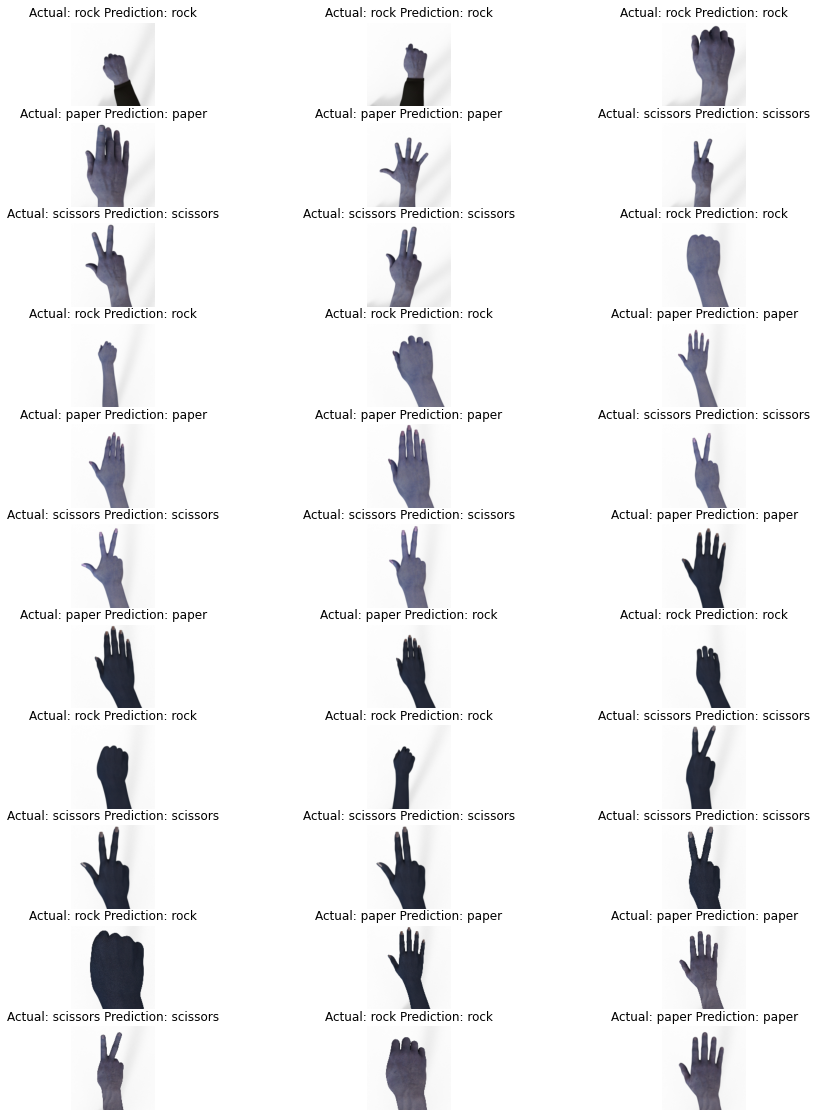

In [ ]:
labels = {'r': 'rock', 'p': 'paper', 's': 'scissors'}      # class labels
pred_labels = {0: 'paper', 1: 'rock', 2: 'scissors'}
fig = plt.figure(figsize=(15, 20))
c = 1
incorrect = 0                                              # counter 
for f in os.listdir('rps-pred/'):                          # Number of test images: 33         
    img = cv2.imread(f'rps-pred/{f}')                      # Reading the image
    img = cv2.resize(img, (150, 150))/255.0                # Resizing the image
    img = np.expand_dims(img, axis=0)
    actual_label = labels[f[0]]                            # Actual class label
    pred = np.argmax(vgg_model.predict(img))               # Predicting the class of the image using VGG16 model
    pred_label = pred_labels[pred]
    if pred_label != actual_label: 
        incorrect += 1                                     # Incrementing the counter if image is misclassified
    plt.subplot(11, 3, c)                                  # Plotting the image
    plt.imshow(np.squeeze(img))
    plt.title(f"Actual: {actual_label} Prediction: {pred_label}")
    c += 1
    plt.axis('off')
plt.show()

In [ ]:
print("Number of incorrect predictions: ", incorrect)

Number of incorrect predictions:  1


Test Accuracy of VGG16 Model = 31/33 = 93.94%
